In [1]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
fs=20

np.seterr(divide='ignore', invalid='ignore') # to ignore dividing by zero warnings for ratio plot

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:






def plotFormationChannelsPerMetallicitySingle(axe=[], metallicities=[0.001, 0.33], formationRates=[0,0], colorlist=['k'], totalcolor='k', BPSmodelname='A',Ylim=3.85, DCOtype='BBH'):
    
    
    # start building from 0
    upperY = np.zeros_like(formationRates[0])
    lowerY = np.zeros_like(formationRates[0])
    
    solar=0.0142

    total = 0 
    for ind_c, c_rate in enumerate(formationRates):
        total += c_rate 
    
    total_sum = np.sum(total)
    
    for ind_c, c_rate in enumerate(formationRates):
        
        # add this rate, 
        upperY += c_rate
        percentage = (np.sum(c_rate) / total_sum)*100.
        percentage_str =  r'$%s$'%str((roundAndFormat1(percentage))) + str(r'\%')
        
        axe.fill_between(metallicities, lowerY*1e5, upperY*1e5, facecolor=colorlist[ind_c], \
                  lw=3, alpha=1, label=percentage_str)
        lowerY += c_rate
    
   

    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                 r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                 r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        axe.plot([zz,zz], [0,Ylim+1], \
                         c='k',\
                         lw=1.2, alpha=1, linestyle=':', zorder=100)   
        axe.text(zz-0.06, Ylim-0.022, s=text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   





        
    # location of the small legends is on the left, unless it does not fit:
    if DCOtype=='BBH':
        x_box, y_box = 0.63, .4
    elif (DCOtype=='BNS') and (BPSmodelname=='G'):
        x_box, y_box = 0.63, .4
    else:
        x_box, y_box = 0.02, .5
        
    axe.legend(fontsize=14,  ncol=2, \
               bbox_to_anchor=(x_box, y_box),loc="lower left", borderaxespad=0., frameon=False).set_zorder(10000)
   
    axe.set_xlim(min(metallicities), max(metallicities))
    axe.set_ylim(0,Ylim)
        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(r'\textbf{model %s:}'%(BPSmodelname) +'\n' + alphabetPhysicalNameDict[BPSmodelname], xy=(0.042, .95),\
                 xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                zorder=1E10)

    
    return axe
    
    

now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


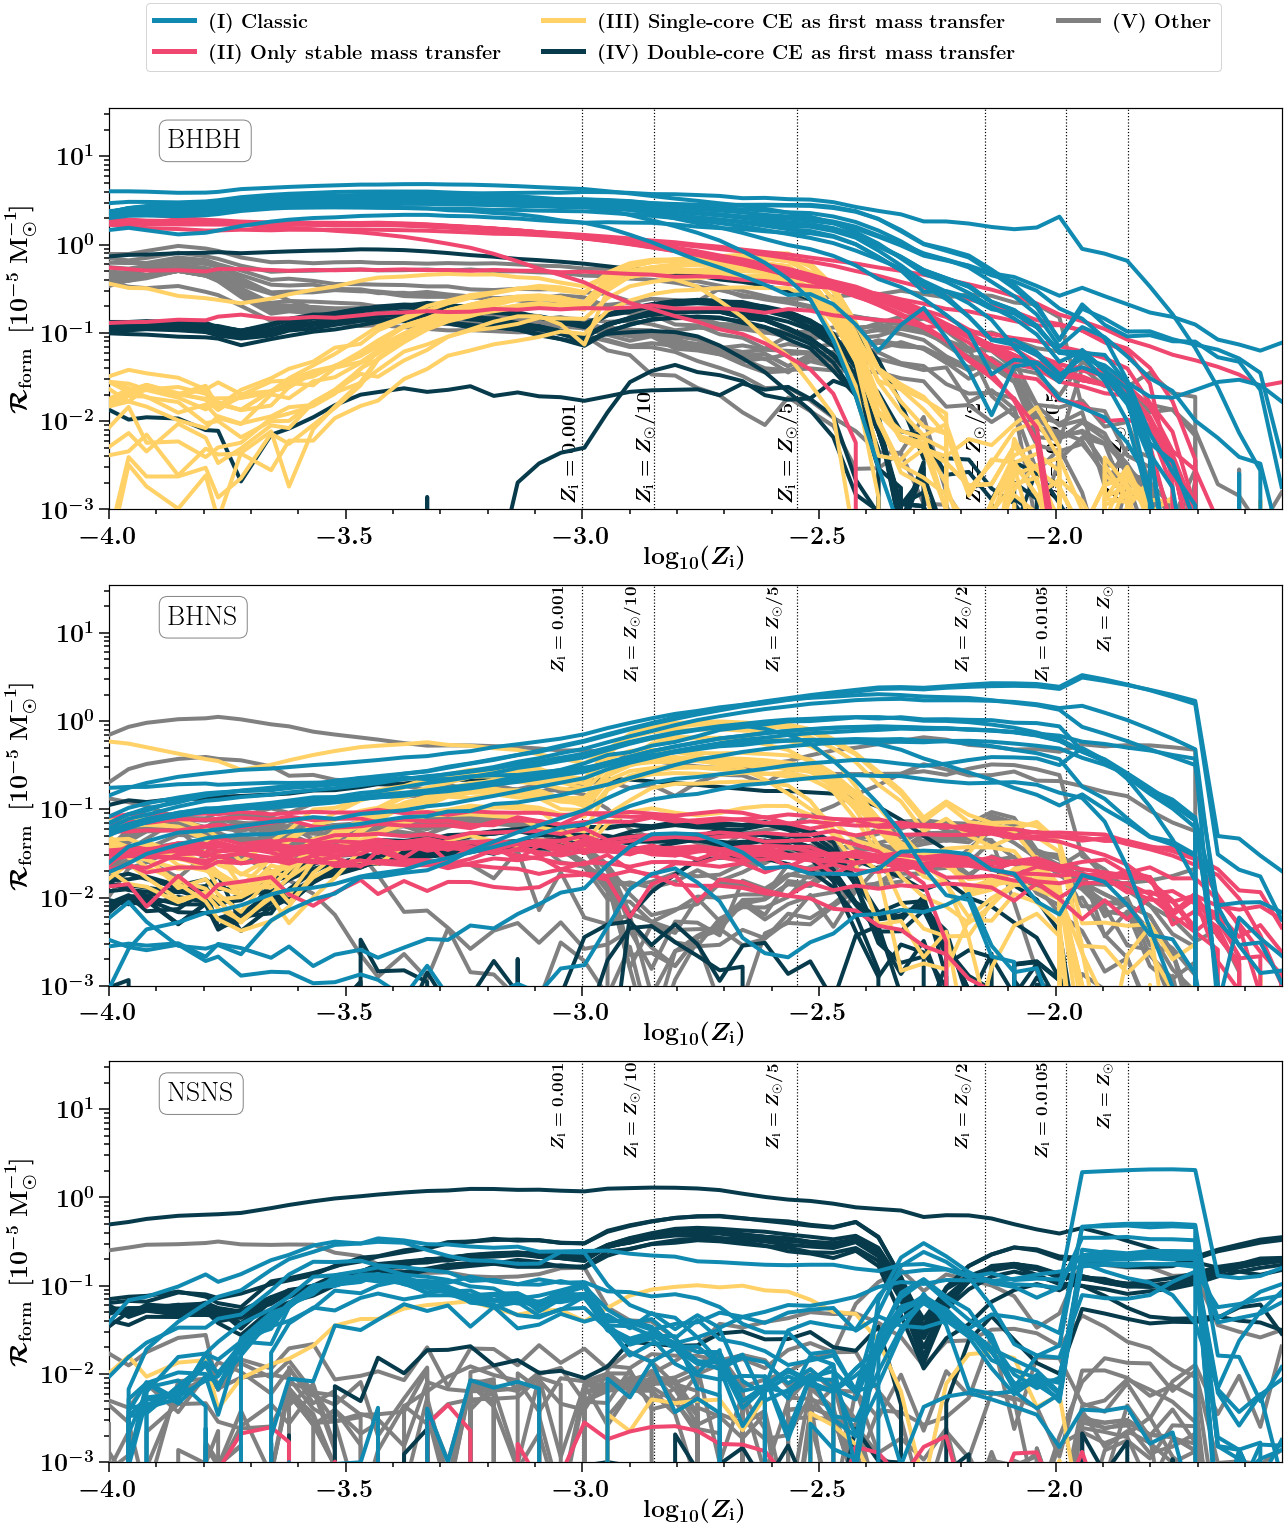

In [39]:
# In a pyramid shape 

def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    

    ncols=1
    nrows=3
    f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  


    channelColorDict = {'I_classic':'#118AB2', 'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    channel_names = ['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    channelColorDict2 = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    channelColorDict = {'I_classic':'#118AB2',  'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=17
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        axe = ax[ind_t]
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        for ind_m, bps_model in enumerate(BPSnameslist):

            for ind_c, whichChannel in enumerate(channel_names):
                # pandas data key
                key_ = bps_model + ' ' + whichChannel + '  [Msun^{-1}]'
                rates = df[key_]
            
                # rate of this channel: 
                upperY = np.asarray(df[key_])


                lw=4


#                 axe.plot(log10metallicities, upperY*1e5, color=channelColorDict[whichChannel], \
#                           lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
#                                 linestyle='-', zorder=zorderlist[ind_m], label=labelname)

                axe.plot(log10metallicities, upperY*1e5, color=channelColorDict[whichChannel], \
                          lw=lw, alpha=1,\
                                linestyle='-', zorder=1000-ind_c)

            
            
        y_top=35
        if ind_t ==0:    
            handles, labels = axe.get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe.plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            if ind_t==0:
                axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
            else:
                axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')

    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'

        nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
        axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

        # set yscale and x and y limits 
        axe.set_yscale('log')
        axe.set_xlim(min(log10metallicities), max(log10metallicities))
        axe.set_ylim(bottom=0.001,top=y_top)

            
        # add which DCO type we are plotting in the top left    
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
#         # add a label for the gray areas in the background 
#         if ind_t in [1,2]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#         if ind_t in [0,1]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#             if ind_t==0:
#                 axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        axe.plot(x__,x__ , lw=5, color=channelColorDict2[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs, ncol=3,\
                         bbox_to_anchor=(.95, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    # add legend, 
    plt.tight_layout()
#     lgd2=plt.legend(handles, labels , fontsize=18, ncol=5,\
#          bbox_to_anchor=(1.06, 3.70)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
    plt.savefig('./FormationRate_FormationChannels.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRate_FormationChannels.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close() 

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


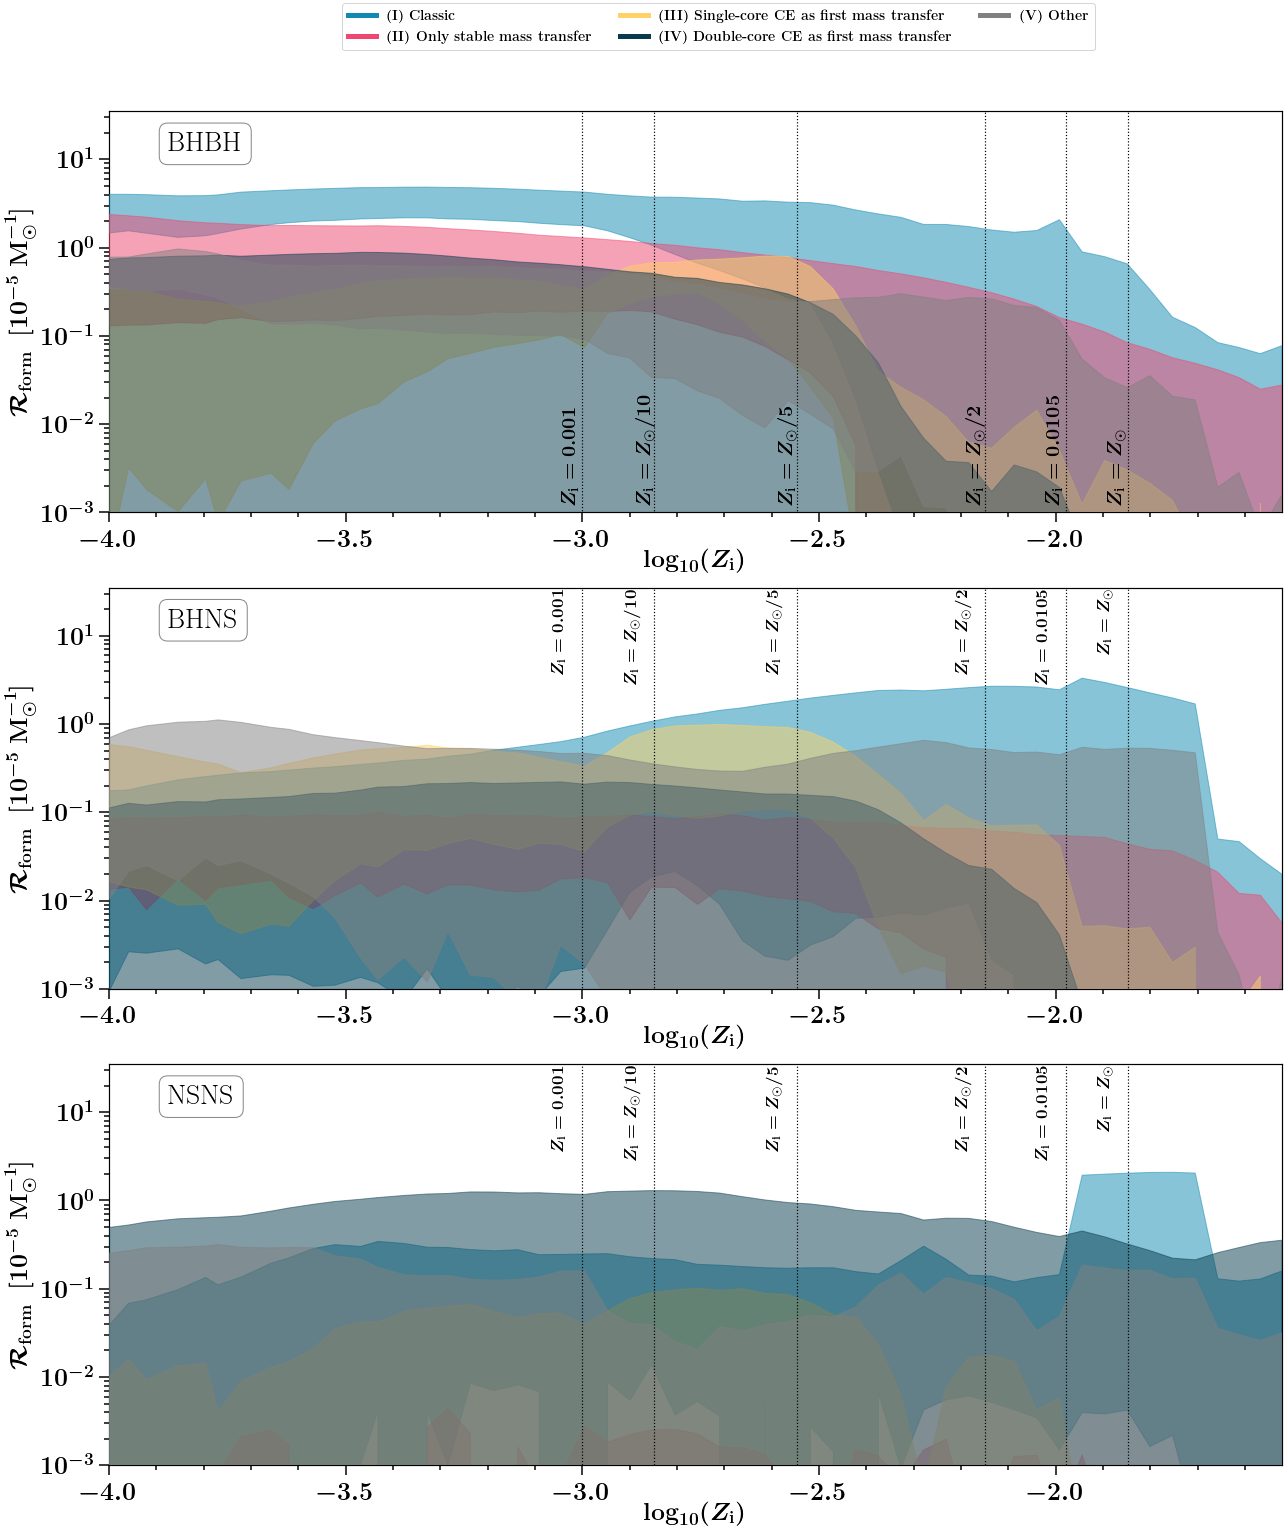

In [29]:
# In a pyramid shape 

def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ_maxmin(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    

    ncols=1
    nrows=3
    f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  


    channelColorDict = {'I_classic':'#118AB2', 'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    channel_names = ['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    channelColorDict2 = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    channelColorDict = {'I_classic':'#118AB2',  'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=17
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        axe = ax[ind_t]
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        

        for ind_c, whichChannel in enumerate(channel_names):
            max_Y = np.ones_like(metallicities) * -1
            min_Y = np.ones_like(metallicities) * 1E4
            
            for ind_m, bps_model in enumerate(BPSnameslist):
                # pandas data key
                key_ = bps_model + ' ' + whichChannel + '  [Msun^{-1}]'
                rates = df[key_]

                # rate of this channel: 
                upperY = np.asarray(df[key_])
                
                max_Y = np.amax([max_Y, upperY], axis=0)
                min_Y = np.amin([min_Y, upperY], axis=0)
                
                lw=2
                ms = 9 



            axe.fill_between(log10metallicities, min_Y*1e5, max_Y*1e5, color=channelColorDict[whichChannel], \
                       alpha=0.5, zorder=zorderlist[ind_m])

            
            
        y_top=35
        if ind_t ==0:    
            handles, labels = axe.get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe.plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            if ind_t==0:
                axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
            else:
                axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')

    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'

        nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
        axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

        # set yscale and x and y limits 
        axe.set_yscale('log')
        axe.set_xlim(min(log10metallicities), max(log10metallicities))
        axe.set_ylim(bottom=0.001,top=y_top)

            
        # add which DCO type we are plotting in the top left    
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
#         # add a label for the gray areas in the background 
#         if ind_t in [1,2]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#         if ind_t in [0,1]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#             if ind_t==0:
#                 axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        axe.plot(x__,x__ , lw=5, color=channelColorDict2[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,\
                         bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    # add legend, 
    plt.tight_layout()
#     lgd2=plt.legend(handles, labels , fontsize=18, ncol=5,\
#          bbox_to_anchor=(1.06, 3.70)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
    plt.savefig('./FormationRate_FormationChannels_fillbetween.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRate_FormationChannels_fillbetween.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close() 

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ_maxmin(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


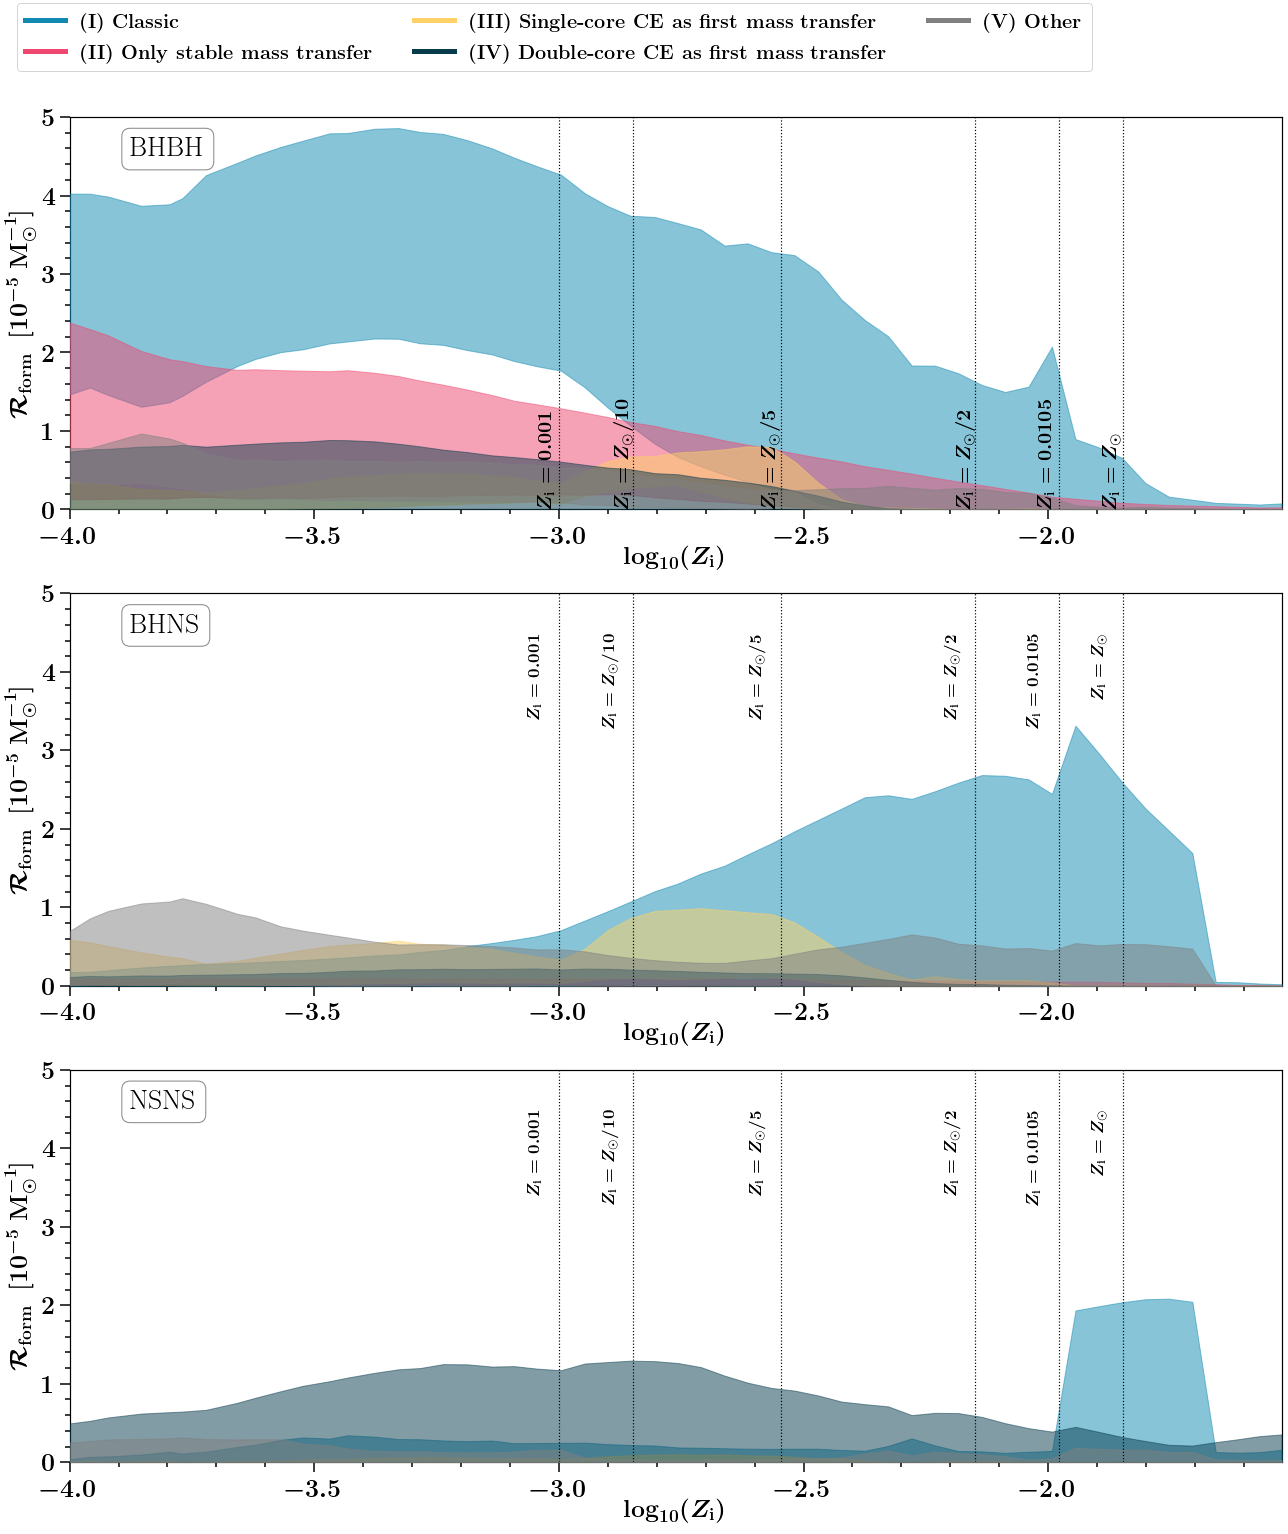

In [37]:
# In a pyramid shape 

def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ_maxmin(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    

    ncols=1
    nrows=3
    f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  


    channelColorDict = {'I_classic':'#118AB2', 'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    channel_names = ['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    channelColorDict2 = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    channelColorDict = {'I_classic':'#118AB2',  'II_only_stable_MT':'#EF476F',  'III_single_core_CE':'#FFD166', 'IV_double_core_CE':'#073B4C', 'V_other':'gray'}
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=17
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        axe = ax[ind_t]
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        

        for ind_c, whichChannel in enumerate(channel_names):
            max_Y = np.ones_like(metallicities) * -1
            min_Y = np.ones_like(metallicities) * 1E4
            
            for ind_m, bps_model in enumerate(BPSnameslist):
                # pandas data key
                key_ = bps_model + ' ' + whichChannel + '  [Msun^{-1}]'
                rates = df[key_]

                # rate of this channel: 
                upperY = np.asarray(df[key_])
                
                max_Y = np.amax([max_Y, upperY], axis=0)
                min_Y = np.amin([min_Y, upperY], axis=0)
                
                lw=2
                ms = 9 



            axe.fill_between(log10metallicities, min_Y*1e5, max_Y*1e5, color=channelColorDict[whichChannel], \
                       alpha=0.5, zorder=zorderlist[ind_m])

            
            
        y_top=5
        if ind_t ==0:    
            handles, labels = axe.get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe.plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            if ind_t==0:
                axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
            else:
                axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')

    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'

        nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
        axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

        # set yscale and x and y limits 
#         axe.set_yscale('log')
        axe.set_xlim(min(log10metallicities), max(log10metallicities))
        axe.set_ylim(bottom=0.00,top=y_top)

            
        # add which DCO type we are plotting in the top left    
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
#         # add a label for the gray areas in the background 
#         if ind_t in [1,2]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#         if ind_t in [0,1]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#             if ind_t==0:
#                 axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        axe.plot(x__,x__ , lw=5, color=channelColorDict2[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs, ncol=3,\
                         bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    # add legend, 
    plt.tight_layout()
#     lgd2=plt.legend(handles, labels , fontsize=18, ncol=5,\
#          bbox_to_anchor=(1.06, 3.70)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
    plt.savefig('./FormationRate_FormationChannels_fillbetween_notlog.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRate_FormationChannels_fillbetween_notlog.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close() 

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ_maxmin(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    
